In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import scipy.cluster.hierarchy as hac
import matplotlib.pyplot as plt

import quandl
quandl.ApiConfig.api_key = "y-zCjPnDPkRm_5tTzGRY"

%matplotlib inline

In [169]:
ticker_list = [
    'EURONEXT/EDEN',
    'EURONEXT/AC',
    'EURONEXT/AI',
    'EURONEXT/AIR',
    'EURONEXT/MT', 
    'EURONEXT/ATO',
    'EURONEXT/CS',
    'EURONEXT/BNP',
    'EURONEXT/EN',
    'EURONEXT/CAP',
    'EURONEXT/CA',
    'EURONEXT/ACA',
]

In [170]:
#data = quandl.get('EURONEXT/AC', start_date="2017-01-01", column_index = 4)


In [171]:
df = pd.DataFrame(columns=['ticker', 'Last'])
for t in ticker_list:
    print(t)
    data = quandl.get(t, start_date='2017-01-01', column_index =4)
    data["ticker"] = t
    if len(data) == 0:
        print("Ticker", t, "is not avaialable")
    df = df.append(data)

EURONEXT/EDEN
EURONEXT/AC
EURONEXT/AI
EURONEXT/AIR
EURONEXT/MT
EURONEXT/ATO
EURONEXT/CS
EURONEXT/BNP
EURONEXT/EN
EURONEXT/CAP
EURONEXT/CA
EURONEXT/ACA


In [172]:
df.reset_index(inplace=True)
df.columns = ["date", "close", "ticker"]
df.head()

,date,close,ticker
0,2017-01-02,19.045,EURONEXT/EDEN
1,2017-01-03,19.710,EURONEXT/EDEN
2,2017-01-04,19.345,EURONEXT/EDEN
3,2017-01-05,19.490,EURONEXT/EDEN
4,2017-01-06,19.480,EURONEXT/EDEN


In [173]:
# use pandas pivot function to sort adj_close by tickers
clean_data = pd.pivot_table(df, index='date', columns="ticker")

# check the head of the output
clean_data.head()

close                                                     \
ticker     EURONEXT/AC EURONEXT/ACA EURONEXT/AI EURONEXT/AIR EURONEXT/ATO   
date                                                                        
2017-01-02      35.715       11.860      105.40        62.82       101.70   
2017-01-03      36.585       12.245      105.65        63.50       102.75   
2017-01-04      37.415       12.300      105.55        63.40       102.00   
2017-01-05      37.990       12.330      105.60        64.60       102.00   
2017-01-06      37.885       12.335      106.05        65.14       102.80   

                                                                            \
ticker     EURONEXT/BNP EURONEXT/CA EURONEXT/CAP EURONEXT/CS EURONEXT/EDEN   
date                                                                         
2017-01-02        60.35      23.320        80.66      24.140        19.045   
2017-01-03        61.92      23.485        80.00      24.430        19.710   
2017-01-04        62.80      23.450        80.20      24.715        19.345   
2017-01-05        62.22      23.435        80.47      24.705        19.490   
2017-01-06        62.49      23.325        80.16      25.000        19.480   

                                    
ticker     EURONEXT/EN EURONEXT/MT  
date                                
2017-01-02      34.195       7.033  
2017-01-03      34.375       7.124  
2017-01-04      34.155       7.103  
2017-01-05      33.990       7.345  
2017-01-06      34.100       7.269

In [174]:
for c in clean_data.columns:
    clean_data[c] = (clean_data[c] - clean_data[c].mean())/clean_data[c].std()

In [175]:
clean_data.head()
clean_data.dropna(inplace=True)

In [176]:
# Do the clustering
Z = hac.linkage(clean_data.values.T, method='single', metric='correlation')

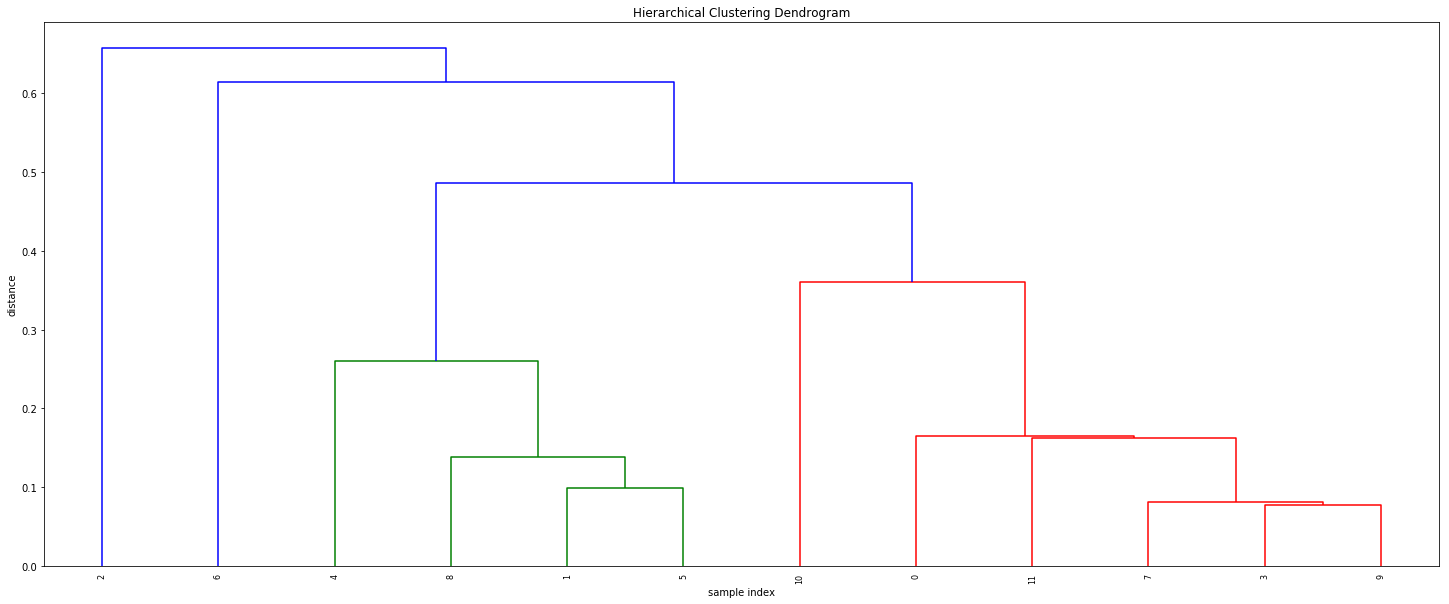

In [177]:
# Plot dendogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
hac.dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()